CANB8347 Machine Learning Project
---
Elaine Chen, Cody Heiser, Wajiha Khalid

---

__Objective:__ Given high-dimensional dataset with live births as labels, build a supervised machine learning model to predict classes in unseen dataset.
* __preprocess__ data into a form amenable to supervised ML algorithms ([`data_preprocessing.ipynb`](data_preprocessing.ipynb))
* evaluate information and __select features__ or __impute missing data__ to best inform classifier ([`imputation.ipynb`](imputation.ipynb))
* benchmark classifiers on training set using cross-validation to determine best algorithm for future predictions ([`cross_val.ipynb`](cross_val.ipynb))

In [1]:
# load required packages and functions from utilities file
from ml_utils import *
%matplotlib inline

In [36]:
# read in file generated by 'vlbw_pipeline.py' script, which combines all techniques above
vlbw_i = pd.read_csv('data/vlbw_train_imputed.csv')

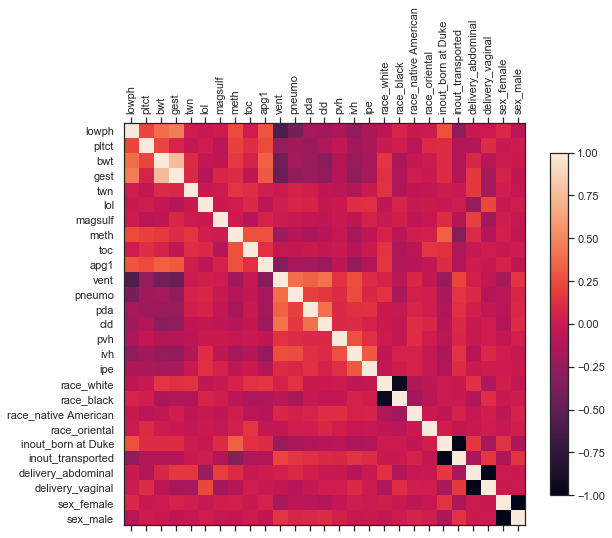

In [60]:
# plot correlation matrix for all features in numeric dataset
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
cax = ax.matshow(vlbw_i.corr(), vmin=-1, vmax=1)
fig.colorbar(cax, shrink=0.7)
ticks = np.arange(0,len(vlbw_i.columns),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(vlbw.columns)
plt.xticks(rotation='vertical')
ax.set_yticklabels(vlbw.columns)
plt.show()

---
#### Data Preprocessing & Feature Selection
First, we need to get all data into a numeric format that can be fed into `sklearn` functions for classification.  
We can also start to throw out extraneous information or observations that we don't want to impute values for.

In [2]:
# read in raw training data
vlbw = pd.read_csv('data/vlbw_train.csv')

In [3]:
# see how many observations and features we are working with
print('{} observations (rows), and {} features (columns)\n'.format(vlbw.shape[0], vlbw.shape[1]))
# look at number of missing observations in each feature
vlbw.isnull().sum()

537 observations (rows), and 27 features (columns)



Unnamed: 0      0
birth          19
exit           27
hospstay       27
lowph          50
pltct          57
race           20
bwt             2
gest            2
inout           1
twn            18
lol           306
magsulf       200
meth           88
toc            88
delivery       21
apg1           29
vent           24
pneumo         21
pda            23
cld            56
pvh           121
ivh           120
ipe           120
year           19
sex            19
dead            0
dtype: int64

In [4]:
# 18 observations with missing 'twn' information seem to be missing a bunch of other stuff
vlbw.loc[vlbw.twn.isnull()]

,Unnamed: 0,birth,exit,hospstay,lowph,pltct,race,bwt,gest,inout,...,vent,pneumo,pda,cld,pvh,ivh,ipe,year,sex,dead
7,8,NaN,NaN,NaN,NaN,NaN,NaN,600.0,26.0,born at Duke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8,9,NaN,NaN,NaN,NaN,NaN,NaN,700.0,24.0,born at Duke,...,NaN,NaN,NaN,NaN,absent,absent,absent,NaN,NaN,1
11,12,NaN,NaN,NaN,NaN,NaN,NaN,550.0,24.0,born at Duke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
23,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,born at Duke,...,NaN,NaN,NaN,NaN,absent,absent,absent,NaN,NaN,1
25,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.0,born at Duke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
30,33,NaN,NaN,NaN,NaN,NaN,NaN,560.0,24.0,born at Duke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
31,34,NaN,NaN,NaN,NaN,NaN,NaN,540.0,24.0,born at Duke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
33,38,NaN,NaN,NaN,NaN,NaN,NaN,880.0,26.0,born at Duke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
37,44,NaN,NaN,NaN,NaN,NaN,NaN,590.0,23.0,born at Duke,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
41,49,NaN,NaN,NaN,NaN,NaN,NaN,1300.0,30.0,transported,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [5]:
# drop the rows that have NaN in the column twn, these seem to have a lot of other missing info
vlbw.dropna(subset=['twn'], inplace=True)
# also get rid of index axis
vlbw.drop('Unnamed: 0', axis=1, inplace=True)

Running PCA on the full dataset (after imputation), we got the loadings for the first PC, which showed that `birth`, `exit`, `hospstay`, and `year` are not very important. Furthermore, they're probably not at all related to death.
![alt text](data/PC1.png)

In [ ]:
# also drop timepoints that we determined to be irrelevant from prior PCA analysis (see imputation.ipynb)
vlbw.drop(['birth','exit','hospstay','year'], axis=1, inplace=True)

Investigate missing values and decide how to impute/what to keep.  
Features with a lot of missing observations:
* lol
* magsulf
* meth
* toc
* pvh
* ivh
* ipe

In [6]:
# add labor length of 0 for any abdominal births without any value already assigned
# C-sections should probably have 0 labor length
vlbw.loc[(vlbw.delivery=='abdominal') & (vlbw.lol.isnull()), 'lol'] = 0

In [7]:
# see if the features correlate with live births
print('lol: {}'.format(vlbw.lol.corr(vlbw.dead)))
print('magsulf: {}'.format(vlbw.magsulf.corr(vlbw.dead)))
print('meth: {}'.format(vlbw.meth.corr(vlbw.dead)))
print('toc: {}'.format(vlbw.toc.corr(vlbw.dead)))

lol: 0.10870113669665055
magsulf: -0.06183780159526858
meth: -0.1651503386980673
toc: 0.010423079240993036


These direct correlations to death are pretty small, let's look at the values in each

In [8]:
print(vlbw.magsulf.value_counts())
print(vlbw.meth.value_counts())
print(vlbw.toc.value_counts())

0.0    292
1.0     45
Name: magsulf, dtype: int64
0.0    254
1.0    195
Name: meth, dtype: int64
0.0    347
1.0    102
Name: toc, dtype: int64


Since these treatments are mostly 0 and do not correlate highly to death, we can assume 0 for the missing values.

In [9]:
vlbw.loc[vlbw.magsulf.isnull(), 'magsulf'] = 0
vlbw.loc[vlbw.meth.isnull(), 'meth'] = 0
vlbw.loc[vlbw.toc.isnull(), 'toc'] = 0

Now look at `pvh`, `ivh`, and `ipe`, which are missing a bunch of values and have more than two levels.

In [10]:
print(vlbw.pvh.value_counts())
print(vlbw.ivh.value_counts())
print(vlbw.ipe.value_counts())

absent      277
definite    102
possible     31
Name: pvh, dtype: int64
absent      345
definite     58
possible      8
Name: ivh, dtype: int64
absent      368
definite     29
possible     14
Name: ipe, dtype: int64


In [11]:
# replace categories with numeric levels based on confidence of diagnosis
for col in ['pvh','ivh','ipe']:
    vlbw.loc[vlbw[col]=='absent', col] = 0
    vlbw.loc[vlbw[col]=='possible', col] = 1
    vlbw.loc[vlbw[col]=='definite', col] = 2
    vlbw.loc[:,col] = vlbw[col].astype('float') # ensure numeric datatype

In [12]:
# correlate death to new numeric pvh values
print('pvh: {}\n'.format(np.round(vlbw.dead.corr(vlbw.pvh.astype('float')),3)))
print('ivh: {}\n'.format(np.round(vlbw.dead.corr(vlbw.ivh.astype('float')),3)))
print('ipe: {}\n'.format(np.round(vlbw.dead.corr(vlbw.ipe.astype('float')),3)))

pvh: 0.153

ivh: 0.397

ipe: 0.134



Now the problem with these values (`pvh`, `ivh`, `ipe`) will be imputation.  How do we impute 120 values in a dataset of 500?  Random sampling introduces noise, but assuming absence could also yield false negatives. See [`imputation.ipynb`](imputation.ipynb) for next steps.

In [13]:
# features that are still categorical
vlbw.dtypes[vlbw.dtypes=='object']

race        object
inout       object
delivery    object
sex         object
dtype: object

In [14]:
# perform numerization on whole dataset
for feature, datatype in zip(vlbw.dtypes.index, vlbw.dtypes):
    if datatype == 'object':
        vlbw = numerize(vlbw, feature)

In [15]:
# look at resulting features and numbers of missing values left
# should be more than we started with, as data is now in long-form
vlbw.isnull().sum()

lowph                    32
pltct                    39
bwt                       0
gest                      1
twn                       0
lol                     164
magsulf                   0
meth                      0
toc                       0
apg1                     11
vent                      6
pneumo                    3
pda                       5
cld                      38
pvh                     109
ivh                     108
ipe                     108
dead                      0
race_white                0
race_black                0
race_native American      0
race_oriental             0
race_nan                  0
inout_born at Duke        0
inout_transported         0
inout_nan                 0
delivery_abdominal        0
delivery_vaginal          0
delivery_nan              0
sex_female                0
sex_male                  0
sex_nan                   0
dtype: int64

There's only one observation where we don't know whether or not they were born at Duke. Let's say they are a Dukie.

In [16]:
vlbw.loc[(vlbw['inout_born at Duke']==0)&(vlbw.inout_transported==0), 'inout_born at Duke'] = 1
vlbw.drop('inout_nan', axis=1, inplace=True)

In [17]:
print(vlbw.sex_nan.value_counts())
print(vlbw.delivery_nan.value_counts())
print(vlbw.race_nan.value_counts())

0    518
1      1
Name: sex_nan, dtype: int64
0    516
1      3
Name: delivery_nan, dtype: int64
0    517
1      2
Name: race_nan, dtype: int64


In [18]:
# drop unknown race, sex, and delivery bc there's not that many missing values
vlbw = vlbw[(vlbw.race_nan!=1) & (vlbw.sex_nan!=1) & (vlbw.delivery_nan!=1)]
vlbw.drop(['race_nan','delivery_nan','sex_nan'], axis=1, inplace=True)

In [19]:
# final obs x features matrix for training after preprocessing
print('{} observations (rows), and {} features (columns)\n'.format(vlbw.shape[0], vlbw.shape[1]))

513 observations (rows), and 28 features (columns)



---
#### Data Imputation
Now we still have some missing values in the dataset. Let's try to impute using educated guesses and maybe some machine learning ;)

In [20]:
# for length of labor ('lol'), let's just use the median of live births for missing live birth values
vlbw.loc[vlbw.lol.isnull(), 'lol'] = np.nanmedian(vlbw[vlbw.delivery_vaginal==1]['lol'])

In [21]:
# replace missing values with the median of the other values
vlbw.fillna(value={'lowph':np.nanmedian(vlbw.lowph),'pltct':np.nanmedian(vlbw.pltct),'gest':np.nanmedian(vlbw.gest),
    'apg1':np.nanmedian(vlbw.apg1),'vent':np.nanmedian(vlbw.vent),'pneumo':np.nanmedian(vlbw.pneumo),'pda':np.nanmedian(vlbw.pda),
    'cld':np.nanmedian(vlbw.cld)}, inplace=True)

In [22]:
# see what's still missing
vlbw.isnull().sum()[vlbw.isnull().sum()>0]

pvh    107
ivh    106
ipe    106
dtype: int64

Now we need to impute a lot of missing values for `ivh`, `pvh`, and `ipe`.  
Let's use a Random Forest Classifier to do so based on the other data.

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

In [24]:
# we wrote a function to do this, but basically you train on known values for each feature, and predict labels for the unknowns
pvh_prediction = impute_with_classifier(df=vlbw.drop(['ivh','ipe'], axis=1), col='pvh', clf=rf)
ivh_prediction = impute_with_classifier(df=vlbw.drop(['pvh','ipe'], axis=1), col='ivh', clf=rf)
ipe_prediction = impute_with_classifier(df=vlbw.drop(['ivh','pvh'], axis=1), col='ipe', clf=rf)

Imputing column "pvh" with accuracy 0.916
Imputing column "ivh" with accuracy 0.983
Imputing column "ipe" with accuracy 0.973


In [25]:
# put values where they belong
vlbw.loc[vlbw.pvh.isnull(), 'pvh'] = pvh_prediction
vlbw.loc[vlbw.ivh.isnull(), 'ivh'] = ivh_prediction
vlbw.loc[vlbw.ipe.isnull(), 'ipe'] = ipe_prediction
# check to see if dataframe is fully imputed
vlbw.isnull().sum()[vlbw.isnull().sum()>0]

Series([], dtype: int64)

Cool beans. Now we can start feeding this training set into some algorithms.

Pull out labels for data as the column that we want to predict (live births), then drop that column from the training data to ignore it in our algorithms

In [38]:
labels = vlbw['dead']
vlbw.drop('dead', axis=1, inplace=True)

Normalize the numeric data within each feature so we can pass it to `sklearn` functions.

In [39]:
# normalize each column to fractional representation between 0 and 1
vlbw_norm = normalize(vlbw, axis=1, norm='l1')

---
#### Algorithm Testing
Finally, test a bunch of supervised classifiers using k-fold validation. Outputs will be:
* AUROC: area under the receiver operator curve; closer to 1.0 is better
* accuracy: number of correct classifications over total attempts
* precision: ability of a classifier to __not__ yield false positives

In [40]:
# load sklearn modules
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

Test using wrapper function from `ml_utils.py`

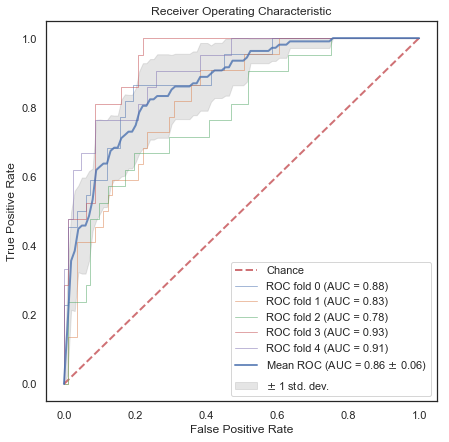

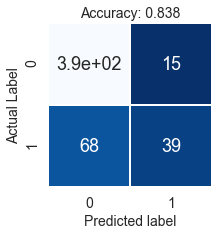

In [48]:
# Logistic Regression Classifier
lr = LogisticRegressionCV(cv=5, random_state=0, multi_class='multinomial', max_iter=1000)
mets = roc_kfold(clf=lr, X=vlbw_norm, y=labels, k=5, seed=18)

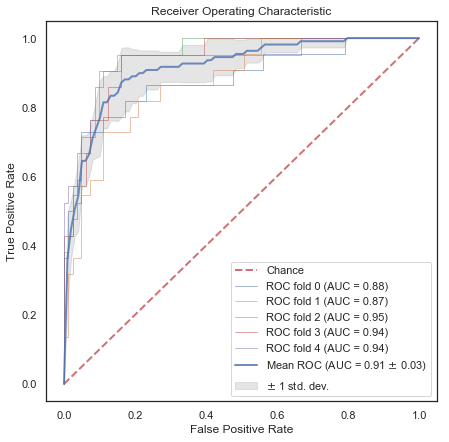

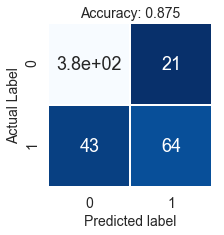

In [59]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=150, max_depth=10, random_state=0)
mets = roc_kfold(clf=rf, X=vlbw_norm, y=labels, k=5, seed=18)

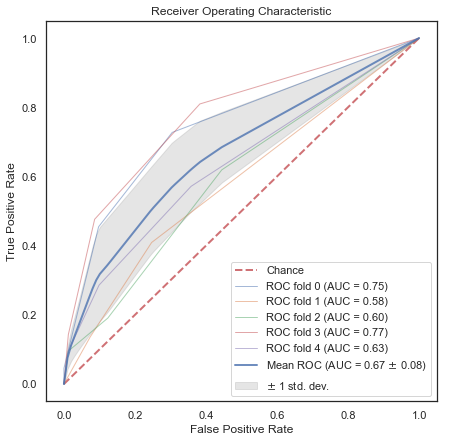

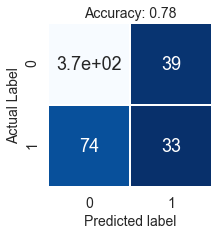

In [50]:
# K-Nearest Neighbors Classifier
kn = KNeighborsClassifier(n_neighbors=3)
mets = roc_kfold(clf=kn, X=vlbw_norm, y=labels, k=5, seed=18)

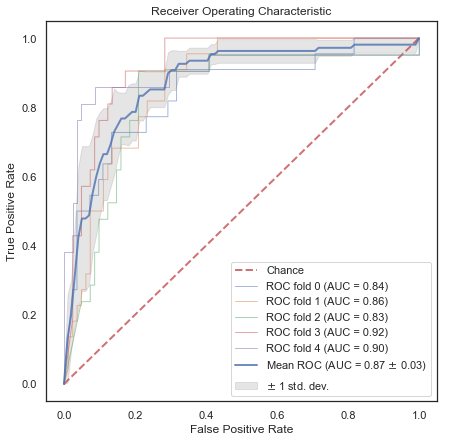

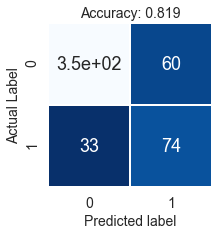

In [51]:
# Gaussian Naive Bayes Classifier
gnb = GaussianNB()
mets = roc_kfold(clf=gnb, X=vlbw_norm, y=labels, k=5, seed=18)

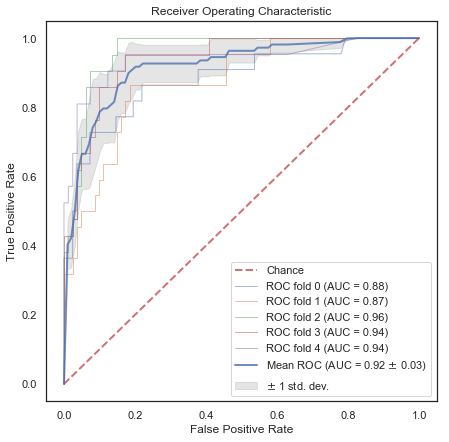

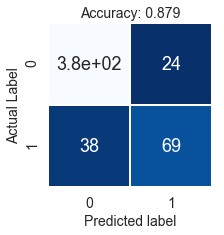

In [52]:
# Gradient Boosting Classifier
gbc = GradientBoostingClassifier()
mets = roc_kfold(clf=gbc, X=vlbw_norm, y=labels, k=5, seed=18)

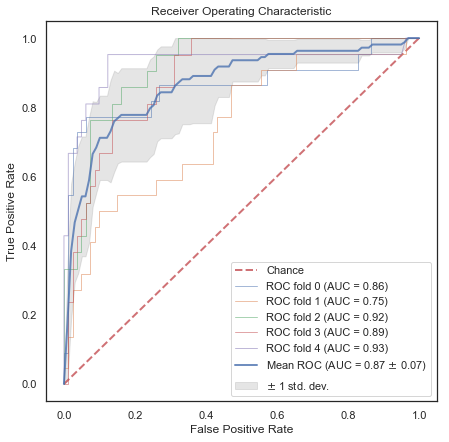

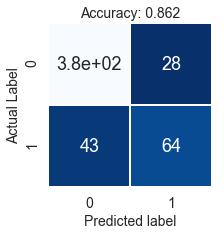

In [53]:
# AdaBoost Classifier
abc = AdaBoostClassifier()
mets = roc_kfold(clf=abc, X=vlbw_norm, y=labels, k=5, seed=18)